<p>Мета: 
Детальне вивчення функцій Лаґерра, їх обчислення та табулювання. Завдання включають проведення обчислювального експерименту для визначення точки, в якій значення всіх функцій Лаґерра менші за ε, обчислення значень інтегралів, виконання прямого та оберненого перетворення Лаґерра для заданої функції, а також побудову графіків для візуалізації результатів. Для цього передбачається розробка трьох програм: одна на Python, інша на Python з використанням принципів об'єктно-орієнтованого програмування (ООП), і третя на C#.</p>

<h2>1.Реалізація програми Лаґерра на Python</h2>

### Підключення необхіних бібліотек

In [241]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
import unittest
from IPython.display import display

### Реалізація функції Лагерра

In [242]:
# 2
def laguerre(t, n, beta=2, sigma=4):
    l0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    if n == 0:
        return l0
    elif n == 1:
        return l1
    elif n >= 2:
        l_n = (2 * 2 - 1 - t * sigma) / 2 * l1 - (2 - 1) / 2 * l0
    for i in range(3, n + 1):
        l0 = l1
        l1 = l_n
        l_n = (2 * i - 1 - sigma * t) / i * l1 - l0 * (i - 1) / i
    return l_n


lagg = laguerre(3, 9)
print(lagg)

6.551978197210897


### Функція для перетворення Лагерра

In [243]:
# 3
def transform_laguerre(f, max_n, beta=2, sigma=4):
    def integrated_function(t):
        return f(t) * laguerre(t, max_n, beta, sigma) * np.exp(-t * (sigma - beta))

    max_t, df = experiment(max_n)
    return integral(integrated_function, 0, max_t)

### Функція для осбчислювання значень інтегралів, обернене перетворення Лагерра

In [244]:
# 4
def integral(f, a, b):
    x = np.linspace(a, b, 1000)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / 1000

def inverse_laguerre_transform(hk, t):
    n = len(hk) - 1  
    result = 0
    for k in range(n + 1):
        result += hk[k] * laguerre(t, k)  
    return result


hk = [1, 2, 3, 4, 5] 
t_values = np.linspace(0, 10, 100)
h_values = [inverse_laguerre_transform(hk, t) for t in t_values]
ht = inverse_laguerre_transform(h_values, t_values)
print(hk)


[1, 2, 3, 4, 5]


### Графік функцій Лагерра з віджетом для вибору n

In [245]:
# 5.1

def plot_laguerre(n):
    t_values = np.linspace(0, 10, 100)
    laguerre_values = [laguerre(t, n, beta=2, sigma=4) for t in t_values]

    plt.figure(figsize=(8, 6))
    plt.plot(t_values, laguerre_values, label=f'L_{n}(t)', color="black")
    plt.xlabel('t')
    plt.ylabel(f'L_{n}(t)')
    plt.title(f'Графік функції Лагерра L_{n}(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

n_widget = widgets.IntSlider(value=0, min=0, max=20, step=1, description='n:')

widgets.interactive(plot_laguerre, n=n_widget)


interactive(children=(IntSlider(value=0, description='n:', max=20), Output()), _dom_classes=('widget-interact'…

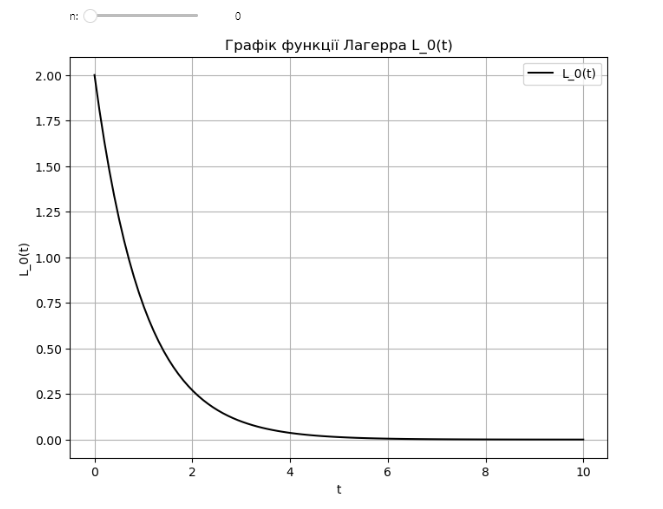

### Графік для табулювання Лагерра та функція табулювання

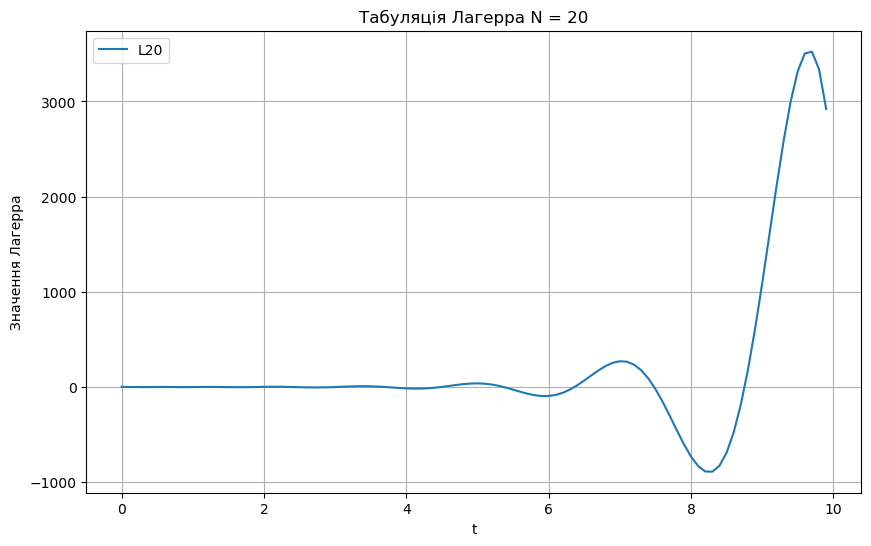

In [246]:
# 5.2
def laguerre_tabulation(n, max_t, beta=2, sigma=4):
    T = np.arange(0, max_t, 0.1)
    return pd.DataFrame(
        data={
            't': T,
            f'L{n}': [laguerre(t, n, beta, sigma) for t in T]
        }
    ).set_index('t')

N = 20
beta = 2
sigma = 4
T = 10

df = laguerre_tabulation(N, T, beta, sigma)

plt.figure(figsize=(10, 6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.title(f'Табуляція Лагерра N = {N}')
plt.xlabel('t')
plt.ylabel('Значення Лагерра')
plt.legend()
plt.grid(True)
plt.show()

### Обчислювальний експеримент, побудова таблички, віджети

In [247]:
# 5.3
def experiment(max_n=20, eps=1e-3, max_t=100):
    T = np.linspace(0, max_t, 1000)
    N = range(0, max_n + 1)
    result = None
    for t in T:
        if t is None:
            continue
        condition_met = True
        for n in N:
            if abs(laguerre(t, n)) > eps:
                condition_met = False
                break
        if condition_met and result is None:
            result = t
            break

    if result is not None:
        N = range(0, max_n + 1)
        return result, pd.DataFrame(
            data={
                'n': N,
                'Ln': [laguerre(result, n) for n in N]
            }
        ).set_index('n')
    else:
        return None, None


max_n_slider = widgets.IntSlider(min=1, max=50, value=20, description='Max n:')
eps_slider = widgets.FloatSlider(min=1e-4, max=1, step=1e-4, value=1e-3, description='Eps:')
max_t_slider = widgets.FloatSlider(min=10, max=200, step=10, value=100, description='Max t:')

def update_experiment(max_n, eps, max_t):
    result, df = experiment(max_n, eps, max_t)
    if result is not None:
        print(f"Result: {result}")
        display(df)

widgets.interactive(update_experiment, max_n=max_n_slider, eps=eps_slider, max_t=max_t_slider)

interactive(children=(IntSlider(value=20, description='Max n:', max=50, min=1), FloatSlider(value=0.001, descr…

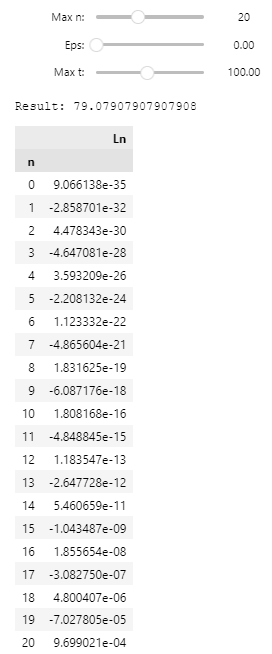

### Обчислюємо наближений інтеграл за методом прямокутників, потім підінтегральної функції і будуємо функцію для обчислення значень інтегралів наближено за даною формулою

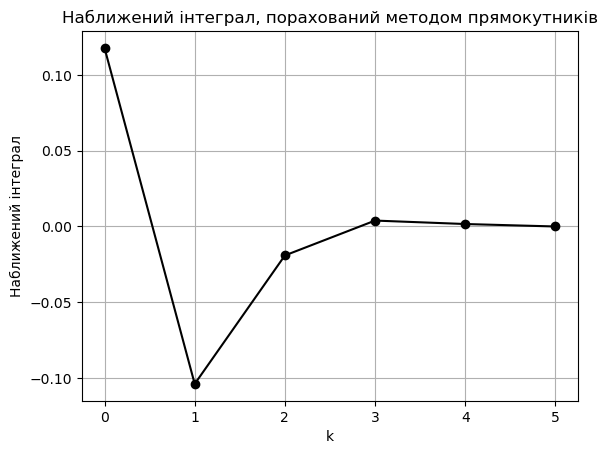

In [248]:
# 5.4
def approximate_integral(f, k, alpha, T, num_rectangles):
    delta_t = T / num_rectangles
    integral_approximation = 0

    for i in range(num_rectangles):
        t_start = i * delta_t
        t_end = (i + 1) * delta_t
        t_mid = (t_start + t_end) / 2


        integrand = f(t_mid) * laguerre(t_mid, k) * np.exp(-alpha * t_mid)
        integral_approximation += integrand * delta_t

    return integral_approximation


alpha = 2
max_k = 5
T = 10
num_rectangles = 1000


def f(t):
    return np.exp(-t) * np.sin(t)


k_values = list(range(max_k + 1))
integral_approximations = [approximate_integral(
    f, k, alpha, T, num_rectangles) for k in k_values]

plt.plot(k_values, integral_approximations, marker='o', linestyle='-', color = "black")
plt.xlabel('k')
plt.ylabel('Наближений інтеграл')
plt.title('Наближений інтеграл, порахований методом прямокутників')
plt.grid(True)
plt.show()

### Шукаємо коефіцієнти при N = 20

In [249]:
#5.5
def f(t):
    if 0 <= t <= 2 * np.pi:
        return np.sin(t - np.pi / 2) + 1
    else:
        return 0
    
N = 20
alpha = 2
laguerre_coeffs = transform_laguerre(f, alpha, N)
data = {'f_k': [f"f_{k}" for k in range(N + 1)], 'coefficients': laguerre_coeffs}
df = pd.DataFrame(data)
data_slider = widgets.SelectionSlider(options = df['f_k'].unique(), description = "Select coefficient:")
widgets.interactive(lambda k: display(df[df['f_k'] == k]['coefficients'].to_string(index=False, header=False)), k = data_slider)


interactive(children=(SelectionSlider(description='Select coefficient:', options=('f_0', 'f_1', 'f_2', 'f_3', …

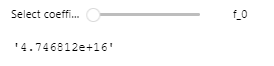

In [250]:
# рандомна функція
def g(t):
    if 0 <= t <= 2 * np.pi:
        return np.cos(t - np.pi / 2) + 1
    else:
        return 0

transform_laguerre(g, 20)


0.15492010687545313

### Обчислюємо значення оберненого перетворення Лагерра для заданого набору коефіцієнтів

In [251]:
#5.6
hk = [1, 2, 3, 4, 5]
t = 2.5
h_t = inverse_laguerre_transform(hk, t)
print(f"h^N({t}) = {h_t}")


h^N(2.5) = -8.482116524469543


### Побудова функції Лагерра для кожного значення у вказаному діапазоні

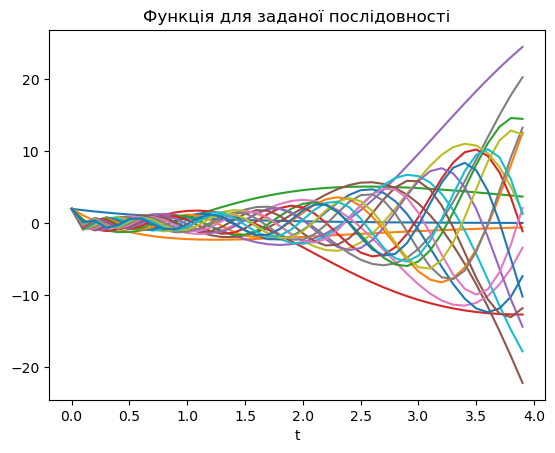

In [252]:
#5.7
def polynomial_laguerre_plot(max_t, n_max):
    for n in range(0, n_max + 1):
        l_n_tabulation = laguerre_tabulation(n, max_t)
        plt.plot(l_n_tabulation.index, l_n_tabulation[f'L{n}'], label=f'L_{n}')

    plt.title('Функція для заданої послідовності')
    plt.xlabel('t')

    plt.show()
    
polynomial_laguerre_plot(4, 20)

### Для кожного N обчислюються коефіцієнти перетворення Лагерра та значення f^N(t)

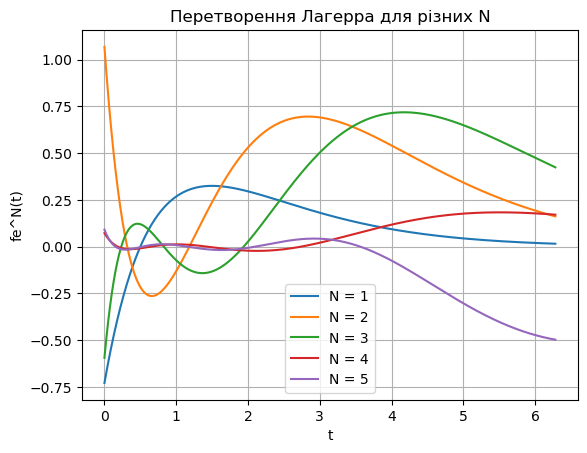

In [253]:
#5.8
def transform_laguerre(f, max_n, beta=2, sigma=4):
    def integrated_function(t):
        return f(t) * laguerre(t, max_n, beta, sigma) * np.exp(-t * (sigma - beta))

    max_t, df = experiment(max_n)
    hk = [integral(integrated_function, 0, max_t) for _ in range(max_n + 1)]
    return hk

N_values = [1, 2, 3, 4, 5]
t_values = np.linspace(0, 2 * np.pi, 1000)

for N in N_values:
    hk = transform_laguerre(f, N)
    fN_values = [inverse_laguerre_transform(hk, t) for t in t_values]

    plt.plot(t_values, fN_values, label=f"N = {N}")

plt.xlabel('t')
plt.ylabel('fe^N(t)')
plt.title("Перетворення Лагерра для різних N")
plt.legend()
plt.grid(True)
plt.show()


<h2>2. Реалізація програми Лаґерра на Python імплементуючи принципи ООП</h2>

### Клас для обчислення інтегралу

In [254]:
class Service:
    # Function for integration
    # f: calleble function - function
    # a: float - left boundary
    # b: float - right boundary
    # margin: float - error
    @staticmethod
    def integrate(f, a: float, b:float , margin=0.001):
        if a > b:
            raise ValueError("left bounder must be lower then right")
        area = 0
        while (abs(b-a) > margin):
            area += margin*f(a+margin/2)
            a += margin
        return area

### Клас функції Лагера

In [255]:
class Laguerre:
    def __init__(self, func, T, beta: int, sigma: int, N: int, epsilon=1e-3):
        if beta > sigma:
            raise ValueError("sigma must be greater than beta")
        self._func = func #: calleble function - function
        self.T = T # : float - ceil value for calculating experiment
        self.beta = beta #: float - beta for laguerre function
        self.sigma = sigma #: float - sigma for laguerre function
        self.N = N # int - max power of laguerre function
        self.epsilon = epsilon #: float - calculation error
        self._recalc()

    @property
    def func(self):
        return self._func

    @func.setter
    def func(self, value):
        print("This is read-only value")

    @property
    def laguerre_transformation_value(self):
        if self._laguerre_transformation_value is None:
            self._laguerre_transformation_value = self.laguerre_transformation()
        return self._laguerre_transformation_value

    @laguerre_transformation_value.setter
    def laguerre_transformation_value(self, value):
        print("This is read-only value")

    @property
    def experiment_value(self):
        if self._experiment_value is None:
            self._experiment_value = self.experiment()
        return self._experiment_value

    @experiment_value.setter
    def experiment_value(self, value):
        print("This is read-only value")

    @property
    def T(self):
        return self._T

    @T.setter
    def T(self, value):
        if value <= 0:
            raise ValueError("T must be positive")
        self._recalc()
        self._T = value

    @property
    def beta(self):
        return self._beta

    @beta.setter
    def beta(self, value):
        if value < 0:
            raise ValueError("Beta must be non-negative")
        self._recalc()
        self._beta = value

    @property
    def sigma(self):
        return self._sigma

    @sigma.setter
    def sigma(self, value):
        if value < 0:
            raise ValueError("Sigma must be non-negative")
        self._recalc()
        self._sigma = value

    @property
    def N(self):
        return self._N

    @N.setter
    def N(self, value):
        if value < 1:
            raise ValueError("N must be at least 1")
        self._recalc()
        self._N = value

    @property
    def epsilon(self):
        return self._epsilon

    @epsilon.setter
    def epsilon(self, value):
        if value <= 0:
            raise ValueError("Epsilon must be positive")
        self._recalc()
        self._epsilon = value

    def _recalc(self):
        self._experiment_value = None
        self._laguerre_transformation_value = None

    def laguerre_function(self, t, n):
        if self.beta < 0 or self.beta > self.sigma or n < 0:
            raise ValueError("Wrong parameters")

        lpp = np.sqrt(self.sigma)*np.exp(-self.beta*t/2)
        lp = np.sqrt(self.sigma)*(1 - self.sigma*t)*np.exp(-self.beta*t/2)

        if n == 0:
            return lpp
        if n == 1:
            return lp

        for i in range(2, n+1):
            temp = lp
            lp = (2*i - 1 - self.sigma*t)*lp/i - (i-1)*lpp / i
            lpp = temp

        return lp

    def experiment(self):
        t = np.linspace(0, self.T, 1000)
        n = range(0, self.N+1)
        true_for_all = False
        result = 0
        for i in t:
            for j in n:
                if abs(self.laguerre_function(i, j)) < self.epsilon:
                    true_for_all = True
                else:
                    true_for_all = False
            if true_for_all:
                result = i
                break
        else:
            result = None
        if result == None:
            raise "The experiment is failed, there is no T that satisfy condition. You can set bigger max T to check"
        self._experiment_value = result
        return result

    def laguerre_transformation(self):
        to = self.experiment_value
        result = [Service.integrate(lambda t: self._func(t)*self.laguerre_function(t, k)
                                    * np.exp(-t*(self.sigma-self.beta)), 0, to, self.epsilon) for k in range(self.N+1)]
        self._laguerre_transformation_value = result
        return result

    def reverse_laguerre_transformation(self, t):
        sum = 0
        for k in range(self.N):
            sum += self.laguerre_transformation_value[k] * \
                self.laguerre_function(t, k)
        return sum


### Клас для табулювання Лагера (наслідується від попереднього класу)

In [256]:
class Laguerre_Tabulator(Laguerre):
    def __init__(self, func, T, beta, sigma, N, epsilon):
        if beta > sigma:
            raise ValueError("sigma must be greater than beta")
        super().__init__(func, T, beta, sigma, N, epsilon)

    def tabulate_laguerre(self, n, to):
        t = np.linspace(1, to, to)
        results = self.laguerre_function(t, n)
        df = pd.DataFrame({'t': t, 'l(t)': results})
        return df

    def tabulate_experiment(self):
        t = self.experiment_value
        lt_values = []
        for n in range(0, self.N+1):
            lt_values.append(self.laguerre_function(t, n))
        cols = {"t": [t]*(self.N+1), "n": range(0,
                                                self.N+1), "L(t)": lt_values}

        return pd.DataFrame(cols)

    def tabulate_laguerre_transformation(self):
        transformed = self.laguerre_transformation_value
        cols = {"n": range(0, self.N+1),
                "transformed": transformed}
        return pd.DataFrame(cols).round(5)


### Клас для візуалізації графіків

In [257]:
class Visualize:
    @staticmethod
    def draw_lauguerre(laguerre_instance, t=None):
        if t is None:
            t = laguerre_instance.experiment_value
        x = np.arange(0, t, 0.01)
        fig, ax = plt.subplots()
        ax.set_title(r'Laguerre polynomials $L_n$')
        for n in np.arange(0, laguerre_instance.N+1):
            ax.plot(x, laguerre_instance.laguerre_function(
                x, n), label=rf'$L_{n}$')
        plt.xlabel('t')
        plt.ylabel('L(t)')
        plt.title('Plot of Laguerre function')
        plt.legend()
        plt.grid(True)
        plt.show()

    @staticmethod
    def draw_reverse_transformation(laguerre_instance, a: float, b: float):
        if a < 0:
            raise ValueError("left boundary must be >= 0")

        def reverse_transformation_func(t):
            return laguerre_instance.reverse_laguerre_transformation(t)
        num = int((b-a)*100)
        t_values = np.linspace(a, b, num)
        f_y_values = np.vectorize(laguerre_instance.func)(t_values)
        f_rlt_y_values = np.vectorize(reverse_transformation_func)(t_values)
        plt.plot(t_values, f_y_values, label=f"Function")
        plt.plot(t_values, f_rlt_y_values,
                 label="Reverse laguerre transformation")
        plt.xlabel('t')
        plt.ylabel('Function Value')
        plt.title(f'Plot of {laguerre_instance.func.__name__}')
        plt.legend()
        plt.grid(True)
        plt.show()


### Клас віджетів

In [258]:
class UI:
    def __init__(self, laguerre_instance):
        self.laguerre_instance = laguerre_instance
        self.laguerre_tabulator_instance = Laguerre_Tabulator(
            laguerre_instance.func, laguerre_instance.T, laguerre_instance.beta, laguerre_instance.sigma, laguerre_instance.N, laguerre_instance.epsilon)

    def draw_lauguerre(self, N, to, beta, sigma):
        self.laguerre_instance.N = N
        self.laguerre_instance.beta = beta
        self.laguerre_instance.sigma = sigma
        Visualize.draw_lauguerre(self.laguerre_instance, to)

    def draw_reverse_transformation(self, N, T, beta, sigma, a, b):
        self.laguerre_instance.T = T
        self.laguerre_instance.N = N
        self.laguerre_instance.beta = beta
        self.laguerre_instance.sigma = sigma
        Visualize.draw_reverse_transformation(self.laguerre_instance, a, b)


    def tubulate_experiment(self, N, T, beta, sigma):
        self.laguerre_tabulator_instance.T = T
        self.laguerre_tabulator_instance.N = N
        self.laguerre_tabulator_instance.beta = beta
        self.laguerre_tabulator_instance.sigma = sigma
        display(self.laguerre_tabulator_instance.tabulate_experiment())

    def tabulate_laguerre(self, beta, sigma, to, n):
        self.laguerre_tabulator_instance.beta = beta
        self.laguerre_tabulator_instance.sigma = sigma
        display(self.laguerre_tabulator_instance.tabulate_laguerre(
            n, to).set_index("t"))
        
    def laguerre_func_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=1, max=100, value=1)
        slider3 = widgets.IntSlider(min=1, max=20, value=1)
        slider4 = widgets.IntSlider(min=1, max=20, value=1)
        widgets.interact(self.draw_lauguerre, N=slider1,
                         to=slider2, beta=slider3, sigma=slider4)



    def reverse_transformation_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=100, max=1000, value=100)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        slider5 = widgets.FloatRangeSlider(
            value=[0, 2*np.pi],
            min=0,
            max=6*np.pi,
            step=0.1,
        )
        widgets.interact(self.draw_reverse_transformation,
                         N=slider1, T=slider2, beta=slider3, sigma=slider4, a=slider5.value[0], b=slider5.value[1])

    def tubulate_experiment_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider2 = widgets.IntSlider(min=1, max=1000, value=100)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        widgets.interact(self.tubulate_experiment, N=slider1,
                         T=slider2, beta=slider3, sigma=slider4)

    def tabulate_laguerre_ui(self):
        slider1 = widgets.IntSlider(min=1, max=20, value=1)
        slider3 = widgets.IntSlider(min=1, max=20, value=2)
        slider4 = widgets.IntSlider(min=1, max=20, value=4)
        slider5 = widgets.IntSlider(min=1, max=100, value=100)
        widgets.interact(self.tabulate_laguerre, n=slider1,
                         beta=slider3, sigma=slider4, to=slider5)


### Unit тестування

In [259]:
class Tests(unittest.TestCase):
    # Default test of integration
    def test_integration_equal(self):
        result = Service.integrate(lambda x: x**2, 0, 4)
        self.assertAlmostEqual(result, 21.333333333, places=4)

    # Test if calculiation rigth
    def test_integration_not_equal(self):
        result = Service.integrate(lambda x: x**2-2, 0, 8)
        self.assertNotAlmostEqual(result, 15.66666666, places=4)

    # Test a>b
    def test_integration_boundaries(self):
        with self.assertRaises(ValueError):
            Service.integrate(lambda x: x**2-2, -2, -6)

    # Test Laguerre constructor
    def test_constructor(self):
        # Test beta validator
        with self.assertRaises(ValueError):
            Laguerre(func_stefa, 100, -1, 4, 20, 0.001)

        # Test beta < sigma
        with self.assertRaises(ValueError):
            Laguerre(func_stefa, 100, 4, 2, 20, 0.001)

        # Test epsilon <= 0
        with self.assertRaises(ValueError):
            Laguerre(func_stefa, 100, 4, 2, 20, 0)

    def test_solve_polynomial(self):
        laguerre_instance = Laguerre(func_stefa, 100, 2, 4, 20, 0.001)

        # Test laguerre function
        result = laguerre_instance.laguerre_function(2, 2)
        self.assertAlmostEqual(result, 4.601399630044832, places=4)

        # Test n < 0
        with self.assertRaises(ValueError):
            laguerre_instance.laguerre_function(2, -1)

    # Test experiment
    def test_experiment(self):
        laguerre_instance = Laguerre(func_stefa, 100, 2, 4, 20, 0.001)
        result = laguerre_instance.experiment()
        self.assertAlmostEqual(result, 79.079079, places=4)

    # Test reverse laguerre transformation
    def test_reverse_transformation(self):
        laguerre_instance = Laguerre(func_stefa, 1000, 2, 4, 10, 0.001)
        result = laguerre_instance.reverse_laguerre_transformation(5)
        self.assertAlmostEqual(result, 0.6395240276904012, places=4)

    # Test tabulate experiment
    def test_experiment_tabulation(self):
        tabulator_instance = Laguerre_Tabulator(
            func_stefa, 200, 2, 4, 15, 0.001)
        self.assertAlmostEqual(tabulator_instance.tabulate_experiment()[
                               't'][0], 61.26126126126127, places=4)
        self.assertAlmostEqual(tabulator_instance.tabulate_experiment()[
            'L(t)'][15], -9.835768e-04, places=4)

    # Test tabulate laguerre
    def test_experiment_tabulation(self):
        tabulator_instance = Laguerre_Tabulator(
            func_stefa, 200, 2, 4, 15, 0.001)
        self.assertAlmostEqual(tabulator_instance.tabulate_laguerre(4, 10)[
                               "l(t)"][1], -2.616482, places=4)
        self.assertAlmostEqual(tabulator_instance.tabulate_laguerre(4, 10)[
                               "t"][3], 4.0, places=4)


### Моя додаткова функція

In [260]:
 def func_stefa(t: float):
    if t >= 0 and t <= 2*np.pi:
        return -1/200*np.sin(t)*np.e**t
    else:
        return 0

In [261]:

tabulator_instance = Laguerre_Tabulator(func_stefa, 100, 2, 4, 10, 0.001)
tabulator_instance.tabulate_experiment()

,t,n,L(t)
0,43.543544,0,2.456458e-19
1,43.543544,1,-4.253951e-17
2,43.543544,2,3.640710e-15
3,43.543544,3,-2.052763e-13
4,43.543544,4,8.576494e-12
5,43.543544,5,-2.831588e-10
6,43.543544,6,7.693555e-09
7,43.543544,7,-1.769005e-07
8,43.543544,8,3.513017e-06
9,43.543544,9,-6.119337e-05


In [262]:
Visualize.draw_reverse_transformation(Laguerre(func_stefa, 100, 2, 4, 20, 0.001), 0, 2*np.pi)

In [ ]:
a = UI(Laguerre(func_stefa, 100, 2, 4, 20, 0.001))
a.laguerre_func_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=1, description='to',…

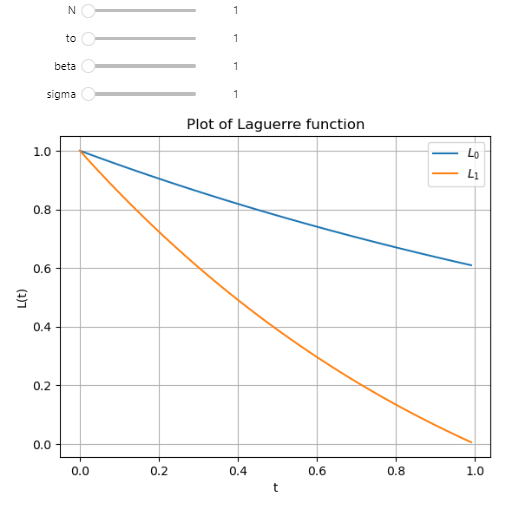

In [ ]:
a.reverse_transformation_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=100, description='T'…

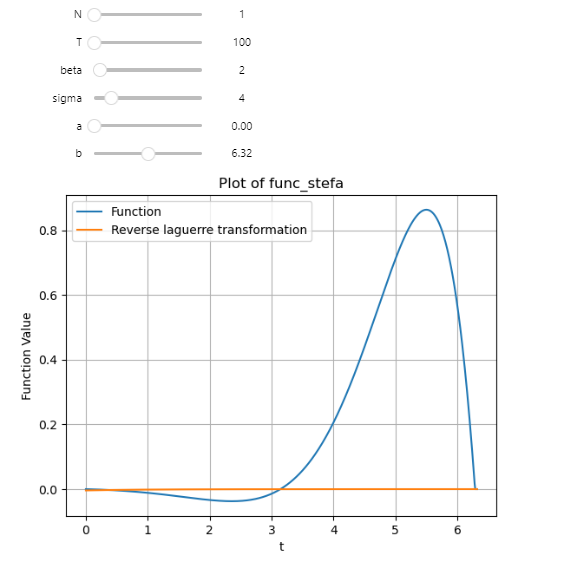

In [ ]:
a.tubulate_experiment_ui()

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), IntSlider(value=100, description='T'…

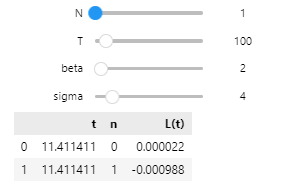

In [ ]:
a.tabulate_laguerre_ui()

interactive(children=(IntSlider(value=2, description='beta', max=20, min=1), IntSlider(value=4, description='s…

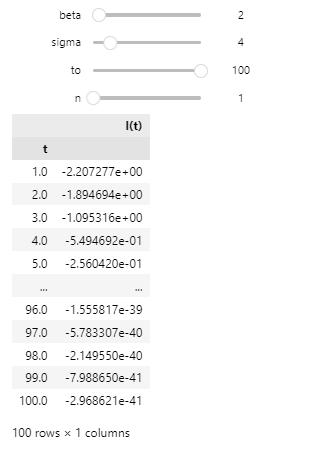

In [ ]:
#Результати тестів
unittest.main(argv=[''], verbosity=3, exit=False)

test_constructor (__main__.Tests.test_constructor) ... ok
test_experiment (__main__.Tests.test_experiment) ... ok
test_experiment_tabulation (__main__.Tests.test_experiment_tabulation) ... ok
test_integration_boundaries (__main__.Tests.test_integration_boundaries) ... ok
test_integration_equal (__main__.Tests.test_integration_equal) ... ok
test_integration_not_equal (__main__.Tests.test_integration_not_equal) ... ok
test_reverse_transformation (__main__.Tests.test_reverse_transformation) ... ok
test_solve_polynomial (__main__.Tests.test_solve_polynomial) ... ok

----------------------------------------------------------------------
Ran 8 tests in 5.713s

OK


### 3. Візуалізація результатів виконання програми Лаґерра на C#

### Табульовані дані значення функції Лагера при певних $n_i$ в точці після якої значення всіх поліномів < N далі менші за ε 

код з C#:

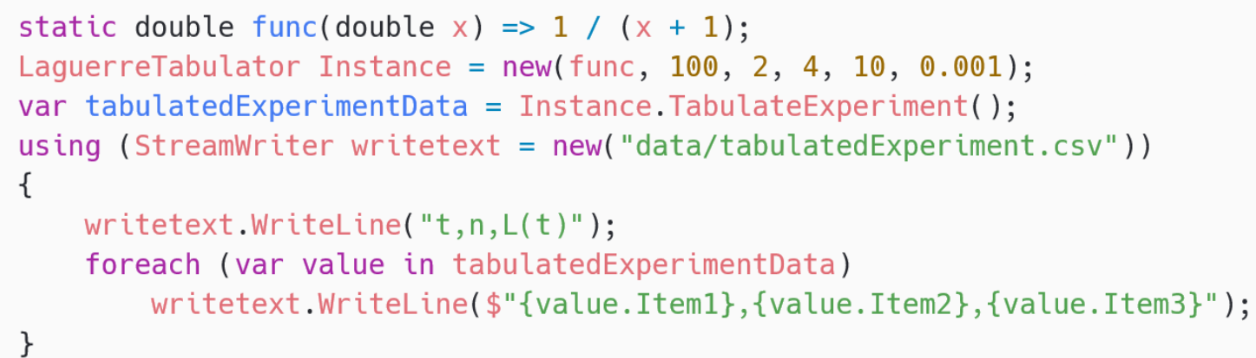

In [ ]:
tabulatedExperiment = pd.read_csv("tabulatedExperiment.csv")
tabulatedExperiment.rename(columns={'t_funcStefa': 't', 'L_(t)_funcStefa': 'L(t)'})[['t', 'L(t)']]

,t,L(t)
0,0,2.012482e-22
1,1,-4.057215e-20
2,2,4.049053e-18
3,3,-2.666741e-16
4,4,1.303750e-14
5,5,-5.046054e-13
6,6,1.610309e-11
7,7,-4.357371e-10
8,8,1.020409e-08
9,9,-2.100466e-07


### Табульовані дані коефіціентів трансформації Лагера 

код з C#:

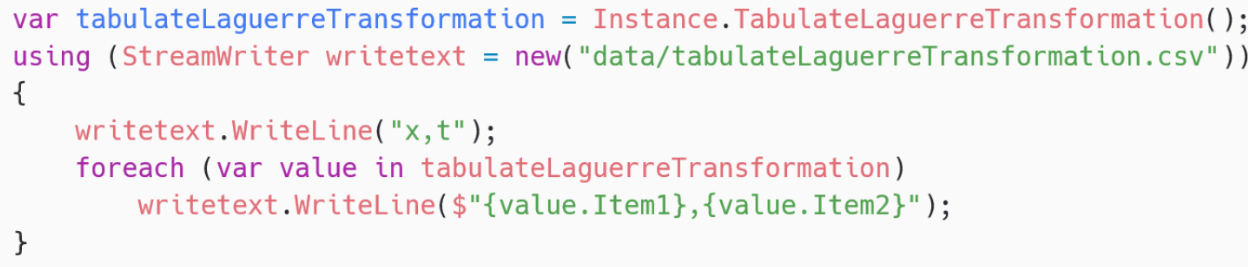

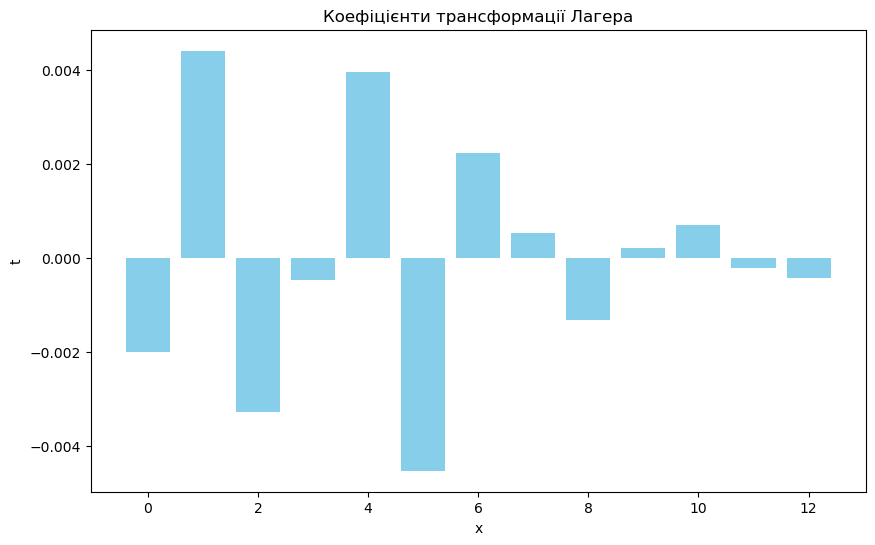

In [ ]:
tabulateLaguerreTransformation = pd.read_csv("tabulateLaguerreTransformation.csv")
tabulateLaguerreTransformation
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(tabulateLaguerreTransformation['x'], tabulateLaguerreTransformation['t_funcStefa'], color='skyblue')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('Коефіцієнти трансформації Лагера')
display(fig.canvas)

### Графіки поліномів різних степенів функції Лагера 

код з C#:

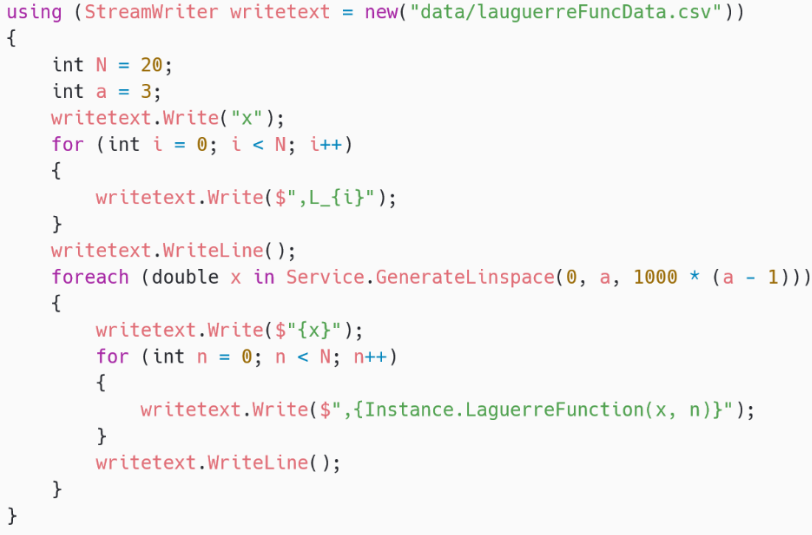

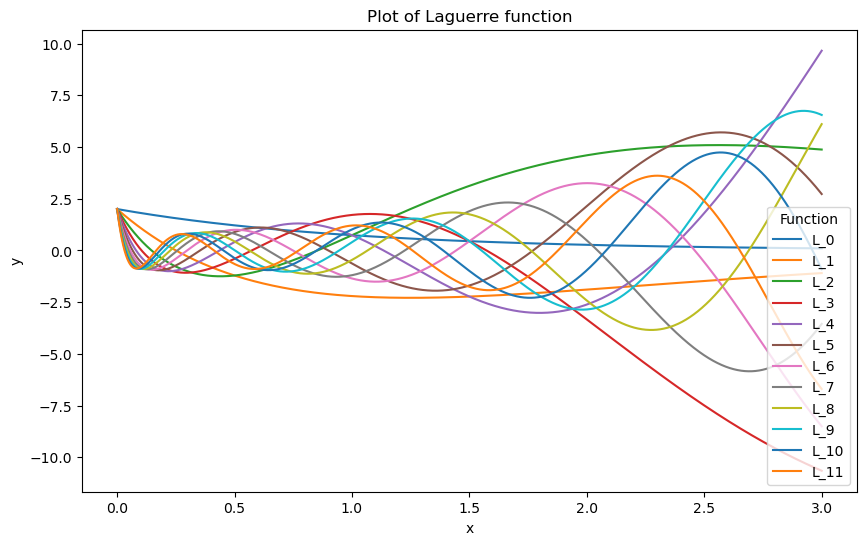

In [ ]:
lauguerreFuncData = pd.read_csv("lauguerreFuncData.csv")
function_names = lauguerreFuncData.columns[1:]

fig, ax = plt.subplots(figsize=(10, 6))
for function_name in lauguerreFuncData.columns[1:]:
    ax.plot(lauguerreFuncData['x'], lauguerreFuncData[function_name], label=function_name)
ax.set_title("Plot of Laguerre function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(title="Function")
display(fig.canvas)

### Графіки обернених трансформацій Лагера для моєї функції

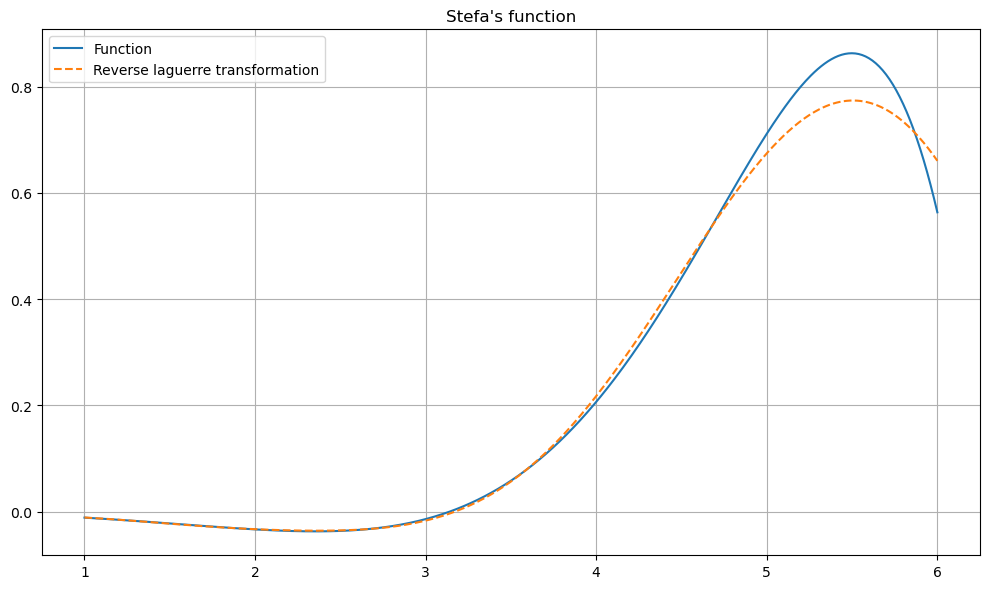

In [ ]:
reverseTransformationData = pd.read_csv("reverseTransformationData.csv")
columns = reverseTransformationData.columns

function_names = [col for col in columns if col != 'x']

num_functions = len(function_names) // 2

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(reverseTransformationData['x'], reverseTransformationData["funcStefa"], label="Function")
ax.plot(reverseTransformationData['x'], reverseTransformationData["funcStefa_transformed"], label="Reverse laguerre transformation", linestyle='--')
ax.set_title(f'Stefa\'s function')
ax.legend()
plt.tight_layout()
plt.grid(True)
display(fig.canvas)

### Графіки обернених трансформації Лагера функції Гаусса з різними параметрами μ і λ 

код з C#:

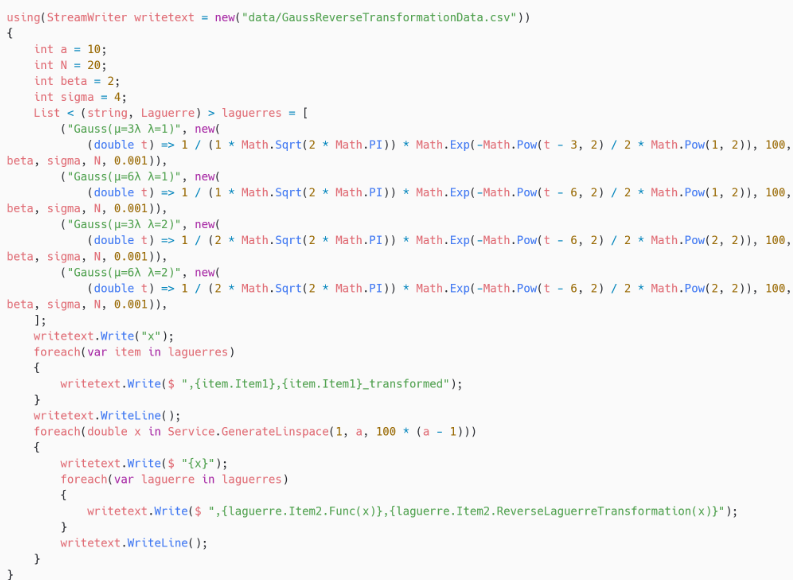

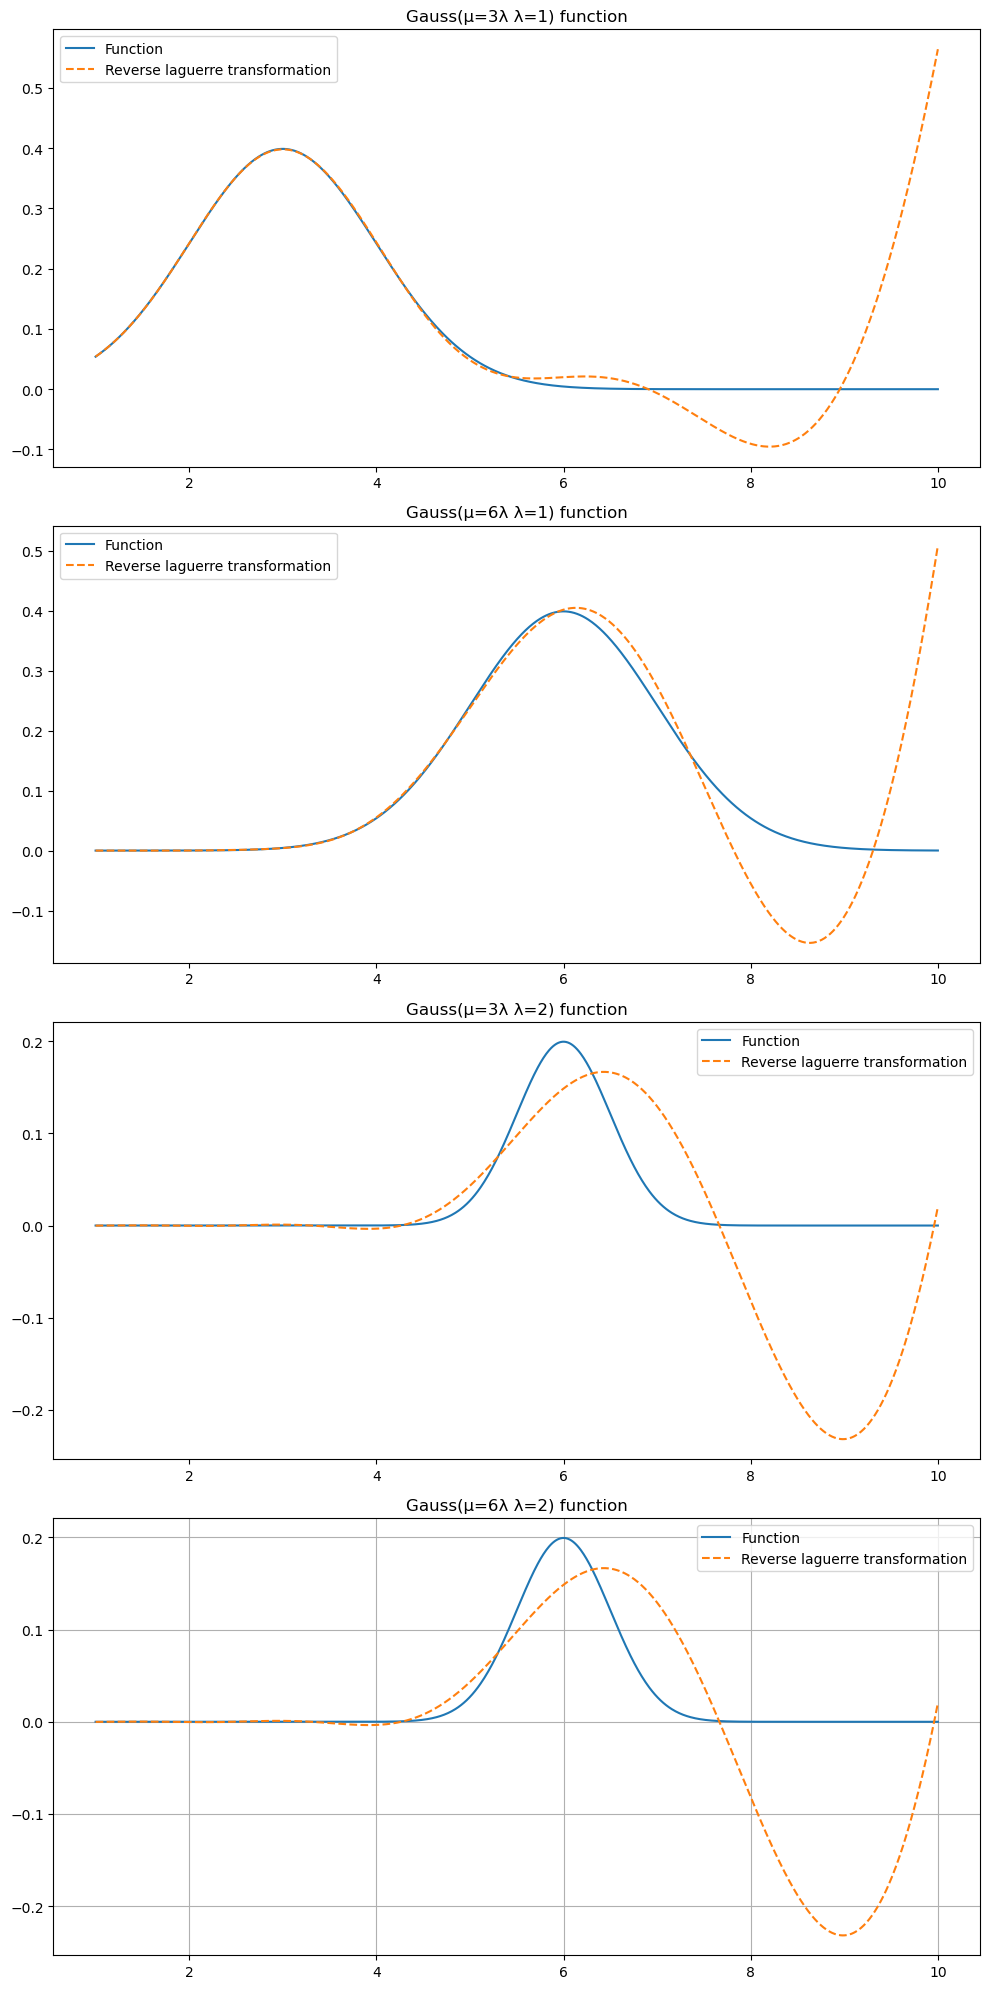

In [ ]:
GaussReverseTransformationData = pd.read_csv("GaussReverseTransformationData.csv")
columns = GaussReverseTransformationData.columns

function_names = [col for col in columns if col != 'x']
function_names
num_functions = len(function_names) // 2

fig, axs = plt.subplots(num_functions, 1, figsize=(10, 5*num_functions))

for i in range(num_functions):
    idx = i * 2
    func_name = function_names[idx].split("_")[0]
    transformed_name = function_names[idx + 1]

    axs[i].plot(GaussReverseTransformationData['x'], GaussReverseTransformationData[function_names[idx]], label="Function")
    axs[i].plot(GaussReverseTransformationData['x'], GaussReverseTransformationData[transformed_name], label="Reverse laguerre transformation", linestyle='--')
    axs[i].set_title(f'{func_name} function')
    axs[i].legend()

plt.tight_layout()
plt.grid(True)
display(fig.canvas)

### Крім цього були реалізовані Xunit tests для коду на c#
Ось результат їх виконання:

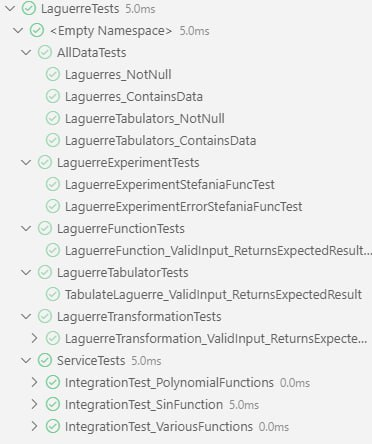